In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [4]:
df  = pd.read_csv("global_energy_2.csv")
df.sort_values(by="Year",ascending = False,inplace = True)

In [5]:
df_India = df[df["Country"]=="India"]
df_Japan = df[df["Country"]=="Japan"]
df_Germany = df[df["Country"]=="Germany"]
df_Russia = df[df["Country"]=="Russia"]
df_Canada = df[df["Country"]=="Canada"]
df_Brazil = df[df["Country"]=="Brazil"]
df_UK = df[df["Country"]=="UK"]
df_China = df[df["Country"]=="China"]
df_Australia  = df[df["Country"]=="Australia"]
df_India.reset_index(inplace=True)

In [ ]:
df["Energy Consumed Per Year (TWh)"]=df.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
carbon_world=df.groupby(["Year"])["Carbon Emissions (Million Tons)"].sum()
carbon_world = pd.DataFrame(carbon_world)
world_energy =df.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
world_energy = pd.DataFrame(world_energy)
fig,ax1= plt.subplots(figsize= (15,6))
plot1 = ax1.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy consumption")
ax1.set_xticks(df["Year"].unique())
plt.xticks(rotation= 90)
ax2 = ax1.twinx()
plot2 = ax2.plot(carbon_world.index,carbon_world["Carbon Emissions (Million Tons)"],color = "orange")
ax2.set_ylabel("Carbon_Emission")
plt.title("Energy Consumed (TWh) Vs Carbon Emitted Per Year(2000-2024)")
ax1.legend(handles=[plot1,plot2],labels=["Energy_Used","C02"],loc= "upper left" )


Text(0.5, 1.0, 'Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country')

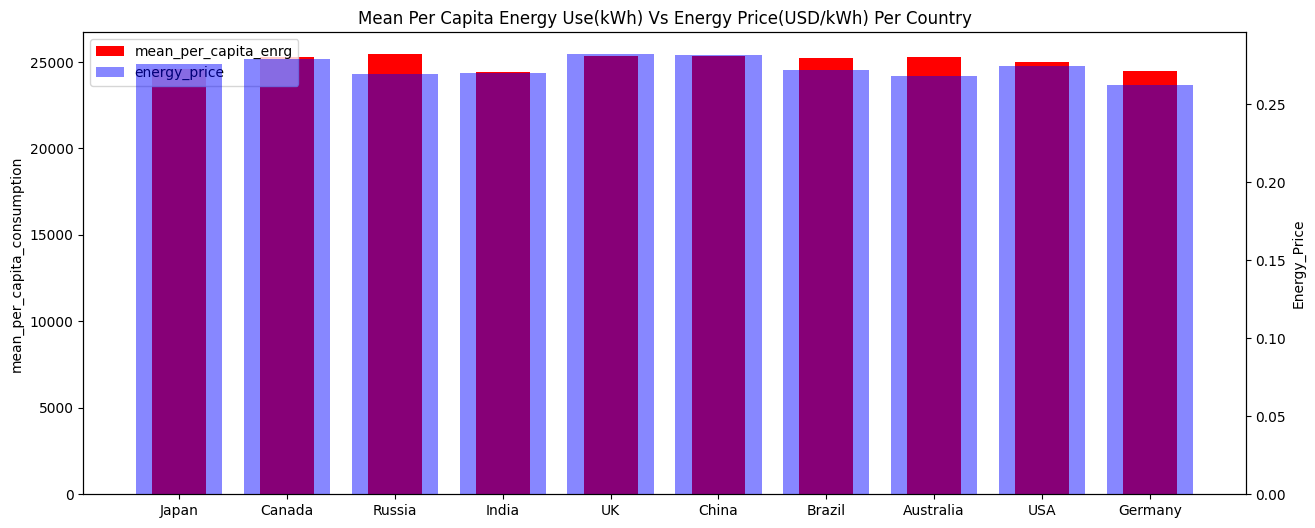

In [7]:

df["per_capita_consumption_mean"]= df.groupby("Country")["Per Capita Energy Use (kWh)"].transform("mean")
df["mean_energy_price_index(USD/kWh)"]= df.groupby(["Country"])["Energy Price Index (USD/kWh)"].transform("mean")
max_PCE= df["per_capita_consumption_mean"].max()
x=np.arange(10)
fig,ax1 = plt.subplots(figsize=(15,6))
bars = ax1.bar(df["Country"].unique(),df["per_capita_consumption_mean"].unique(),color ="red",width=0.5)
ax1.set_ylabel("mean_per_capita_consumption")
ax2= ax1.twinx()
plot = ax2.bar(df["Country"].unique(),df["mean_energy_price_index(USD/kWh)"].unique(),label="enery_price(USD/kWh)",color="blue",alpha=0.47)
ax2.set_ylabel("Energy_Price")
ax1.set_xticks(df["Country"].unique())
ax1.legend(
    handles=[bars,plot],
    labels=["mean_per_capita_enrg","energy_price"],
    loc="upper left"
)
plt.title("Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country")



In [ ]:
IEC = df.loc[df["Year"]==2024,["Country","Year","Industrial Energy Use (%)"]]

IEC["IEC_mean(%)"] = IEC.groupby(["Country"])["Industrial Energy Use (%)"].transform("mean")
IEC.sample(10)
IEC_mean_data = IEC[["Country","Year","IEC_mean(%)"]]
IEC_mean_data.drop_duplicates(inplace = True)
IEC_mean_data
plt.figure(figsize=(10,5))
plt.bar(IEC_mean_data["Country"],IEC_mean_data["IEC_mean(%)"],color="orange")
plt.title("Industrial Energy Consumption Percentage(%) in 2024 ")


In [9]:
df.sample(10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Energy Consumed Per Year (TWh),per_capita_consumption_mean,mean_energy_price_index(USD/kWh)
9027,Australia,2017,9878.29,40231.01,36.21,22.70,34.31,10.36,1847.26,0.44,2112110.76,25286.890891,0.268168
2603,UK,2016,6652.03,20601.46,58.47,42.27,37.91,38.75,1527.03,0.05,2168133.23,25360.567108,0.281992
7517,USA,2000,7924.65,5808.97,46.47,43.83,48.16,17.14,2725.83,0.37,1818935.94,25010.767341,0.274330
99,Russia,2002,7723.30,33857.53,11.87,45.31,31.53,28.59,4259.59,0.23,1908410.61,25444.496308,0.269183
703,Australia,2009,2473.47,13833.56,46.74,17.34,36.00,19.59,1423.13,0.22,2079832.67,25286.890891,0.268168
8284,Australia,2008,7221.62,26314.00,58.68,10.05,34.01,26.04,2971.85,0.15,1996911.00,25286.890891,0.268168
3734,Russia,2005,5515.69,8218.64,42.83,21.37,39.77,10.12,142.47,0.44,2024460.81,25444.496308,0.269183
1500,Australia,2000,936.98,23021.20,19.32,45.10,33.90,22.29,4093.80,0.38,1818935.94,25286.890891,0.268168
5217,Brazil,2016,838.73,29640.55,85.28,17.34,21.52,13.31,3898.51,0.49,2168133.23,25211.646351,0.271996
7486,Brazil,2011,4262.25,14333.03,53.39,19.42,34.85,17.65,1554.41,0.41,2061465.08,25211.646351,0.271996


In [ ]:
df_India.head()
df_India["Total_energy_consumption_per_year"]= df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
india_energy=df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
india_energy = pd.DataFrame(india_energy)
df_India["Mean_energy_consumption_percentage_per_year"]= df_India.groupby(["Year"])["Renewable Energy Share (%)"].transform("mean")
fig,ax1= plt.subplots(figsize=(15,6))
bar = ax1.bar(india_energy.index,india_energy["Total Energy Consumption (TWh)"],alpha=0.5)
ax1.set_xticks(df["Year"].unique())
ax1.set_ylabel("Energy in Twh")
ax1.set_xlabel("Year")
ax2 = ax1.twinx()
bar2 = ax2.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"],color="red",width=0.4)
plt.xticks(rotation=90)
plt.title("Trend of total Energy Consumption Per Year in India Vs the world")
ax1.legend(handles=[bar,bar2],labels=["India","World"],loc="upper left")

In [11]:
df_India.sample(10)

,index,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Total_energy_consumption_per_year,Mean_energy_consumption_percentage_per_year
428,5467,India,2014,3315.45,14246.69,7.42,31.84,49.41,38.51,4627.95,0.46,191467.25,42.175676
183,7516,India,2020,6853.05,38154.39,23.00,78.50,30.51,13.39,1856.63,0.28,238187.52,47.677727
926,9472,India,2001,4662.81,25287.03,44.38,11.75,54.99,26.78,4179.68,0.25,206040.13,50.250513
236,5739,India,2018,2009.65,33060.04,46.46,79.09,21.83,22.35,2345.71,0.37,287561.33,56.457500
98,4965,India,2022,9458.43,18478.09,80.37,49.36,37.25,30.12,1609.80,0.37,236272.87,52.014792
746,1226,India,2006,2158.09,6140.31,70.53,72.48,23.80,27.80,2336.04,0.41,197950.01,50.593030
376,9843,India,2015,7395.32,19576.84,58.16,43.48,52.18,10.18,2237.04,0.10,284047.95,46.888824
855,5820,India,2003,9322.24,5244.35,30.83,53.58,53.51,36.31,2333.24,0.45,217603.39,38.883333
879,3181,India,2003,7813.04,36122.84,34.54,40.48,40.36,22.52,3420.67,0.08,217603.39,38.883333
972,747,India,2000,4249.14,29331.58,67.65,12.34,31.99,30.58,3661.79,0.20,152724.84,43.740303
